<a href="https://colab.research.google.com/github/anujsahay112/MachineLearning_Python/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Fashion dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test (1).csv


KeyboardInterrupt: ignored

In [0]:
fashion_train_df=pd.read_csv("fashion-mnist_train.csv")

In [42]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33588 entries, 0 to 33587
Columns: 785 entries, label to pixel784
dtypes: float64(530), int64(255)
memory usage: 201.2 MB


In [0]:
fashion_test_df=pd.read_csv("fashion-mnist_test.csv")

In [44]:
fashion_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [45]:
fashion_train_df.shape

(33588, 785)

In [46]:
fashion_test_df.shape

(10000, 785)

In [0]:
training=np.array(fashion_train_df,dtype='float32')

In [0]:
testing=np.array(fashion_test_df,dtype='float32')

7.0

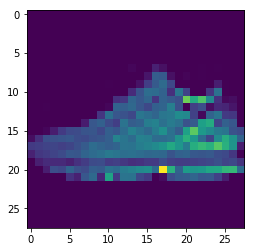

In [49]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

In [0]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [0]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_validate,y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 49)

In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28,1))

In [0]:
X_test = X_test.reshape(X_test.shape[0], *(28, 28,1))

In [0]:
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28,1))

In [57]:
X_train.shape

(26870, 28, 28, 1)

In [58]:
X_test.shape

(10000, 28, 28, 1)

In [59]:
X_validate.shape

(6718, 28, 28, 1)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model = Sequential()

In [62]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28,28,1), activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [0]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
cnn_model.add(Flatten())

In [65]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [66]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [0]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics = ['accuracy'])

In [0]:
epochs = 50

In [69]:
cnn_model.fit(X_train,
            y_train,
            batch_size = 512,
            nb_epoch = epochs,
            verbose = 1,
            validation_data = (X_validate, y_validate))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 26870 samples, validate on 6718 samples
Epoch 1/50
26870/26870 [==============================] - 9s 336us/step - loss: nan - acc: 0.1397 - val_loss: nan - val_acc: 0.0921
Epoch 2/50
26870/26870 [==============================] - 9s 341us/step - loss: nan - acc: 0.1028 - val_loss: nan - val_acc: 0.0921
Epoch 3/50
26870/26870 [==============================] - 9s 339us/step - loss: nan - acc: 0.1028 - val_loss: nan - val_acc: 0.0921
Epoch 4/50
26870/26870 [==============================] - 9s 335us/step - loss: nan - acc: 0.1028 - val_loss: nan - val_acc: 0.0921
Epoch 5/50
26870/26870 [==============================] - 9s 338us/step - loss: nan - acc: 0.1028 - val_loss: nan - val_acc: 0.0921
Epoch 6/50
26870/26870 [==============================] - 9s 336us/step - loss: nan - acc: 0.1028 - val_loss: nan - val_acc: 0.0921
Epoch 7/50
26870/26870 [==============================] - 9s 330us/step - loss: nan - acc: 0.1028 - val_loss: nan - val_acc: 0.0921
Epoch 8/50
26870/26870 [===

In [70]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 130us/step
Test Accuracy : 0.100


In [0]:
predicted_classes = cnn_model.predict_classes(X_test)

In [72]:
predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

AttributeError: ignored

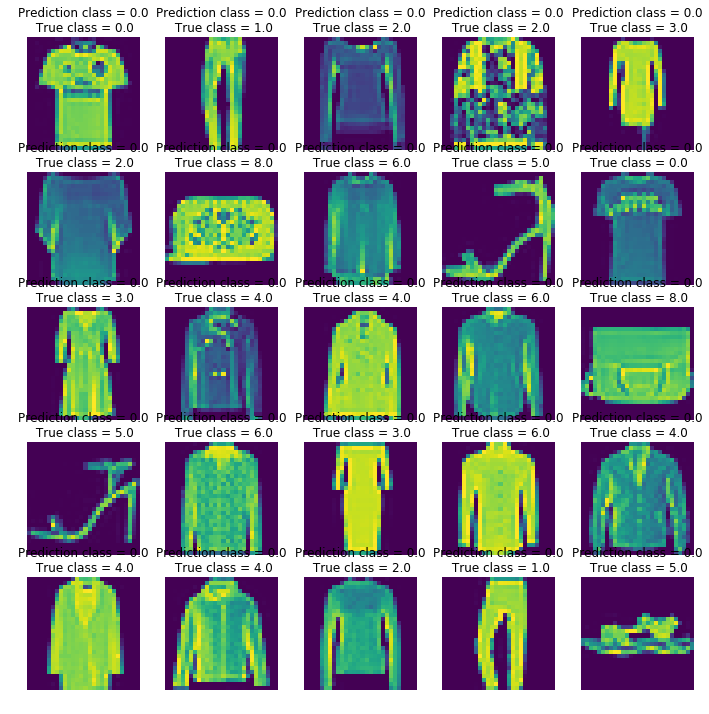

In [73]:
L = 5
W = 5
fig, axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplot_adjust(wspace=0.5)

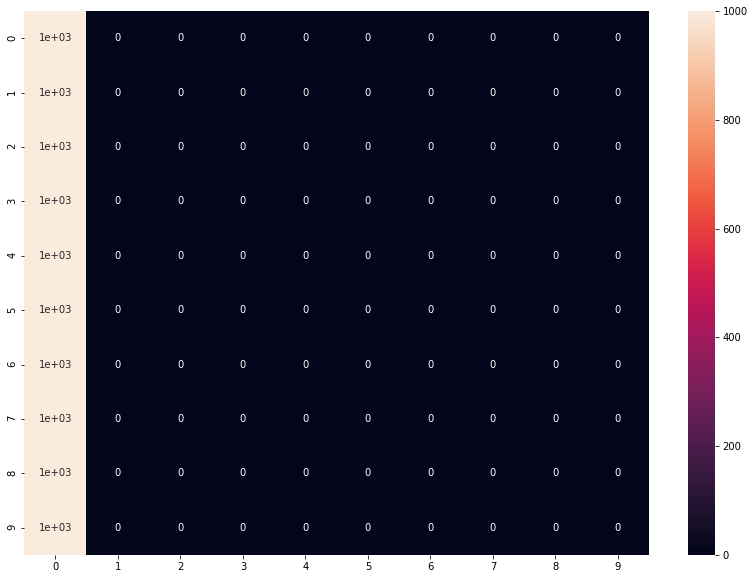

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [75]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes,target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.10      1.00      0.18      1000
     class 1       0.00      0.00      0.00      1000
     class 2       0.00      0.00      0.00      1000
     class 3       0.00      0.00      0.00      1000
     class 4       0.00      0.00      0.00      1000
     class 5       0.00      0.00      0.00      1000
     class 6       0.00      0.00      0.00      1000
     class 7       0.00      0.00      0.00      1000
     class 8       0.00      0.00      0.00      1000
     class 9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
